## Youtube Videos Exploratory Data Analysis With Youtube API and NLP From Popular Education Channels

### 1. Introduction and Objectives

As part of my portfolio, this work represents a fragment of both my ability in the technical field and my personal attributes like my critical thinking, problem-solving approach, communication skills, or even my personality. I hope everyone from all walks of life can understand and grasp what this project is really all about, as I made it with that priority in mind.

For this project, I'll dwell deep into exploring different Youtube channels whose contents fall into the *'educational'* category as recognized by its countless viewers (like me). I will admit that this selection of channels is subjectively based on my cup of tea, but I figured it would be nice to explore the numbers and bits of the the channels that constantly provide knowledge and facts for a lot of people, much better than TV anyways.<br>
So, what are these channels I talk highly of? Let's see: <br>
1. [**Johnny Harris**](https://www.youtube.com/@johnnyharris)
2. [**PolyMatter**](https://www.youtube.com/@PolyMatter)
3. [**OBF**](https://www.youtube.com/@OBFYT)
4. [**Wendover Productions**](https://www.youtube.com/@Wendoverproductions)
5. [**Sam O'Nella Academy**](https://www.youtube.com/@SamONellaAcademy)
6. [**OverSimplified**](https://www.youtube.com/@OverSimplified)

<img src="https://i.pinimg.com/originals/8a/a3/6a/8aa36a96f42177ef025c00a5715b5087.jpg" width="1000" align="center" />


Now, these channels have some key differences in their content selection and interpretation, you can probably tell just by looking at the picture. Let's face it, everyone has their own style and uniqueness that differentiates itself to the rest of the game. So, why did I decide to explore these channels? More so, packaged together in this project? <br>

Well all of them cover the same theme of topics on a daily basis, which tends to fall in the realms of history, geopolitics, economics, healthcare, educational facts, and more. Furthermore, all those channels use a differing combination of animations and visualizations techniques to make their videos easier to interpret and perceive. Delivery-wise, some of them more serious, some full of memes, some filled with absurd dry humor, but all of them provide good content in enriching the knowledge of their viewers. That's more than enough in my book honestly.

#### 1.1. Scope of Work / Objectives

Regardless, let's define the questions or objectives of this project. This acts as the limits or the scope of work to focus on.<br>
Now here's what I'd like to do and explore:
- Obtain the data by utilizing the Youtube API.
- Video data analysis, a numerical approach in extracting data insights, which will be:
    1. General exploratory data analysis
    2. Does longer videos translate to more or less viewers and interactions?
    3. Do the amount of likes and comments matter to number of views?
    4. Does title length affect the number of views?
    5. Which days are the videos most uploaded by each channel?
    6. Does more tags affect the number of views? If so, how many tags?
- Introduce and use the NLP (Natural Language Processing) methods to gain a qualitative understanding of:
    7. What are the most popular topics? (In a more specific manner)
    8. In the comments section, what are the words or topics that frequently appear?

Of course, one can think of many other thing to explore. There are many ideas or things that can be expanded from this project. But for now, let's stick to the objectives.

#### 1.2. Youtube Data API v3 Usage

Data collection through APIs such as Youtube API, is one of the most credible method of data sourcing. What this method does is basically collecting metadata of each video of each specified channel through a specific process of request and response. For those unfamiliar with APIs, think of it as a way of querying very specific things like googling, but with APIs as the medium. Another benefit worth mentioning, as these data are esentially generated by computers, users would have little concern on having to clean the data, checking for inconsistencies, et cetera. Basically, it eliminates the human error part that usually occurs as if the data input is done by humans.<br><br>
Youtube or Google as a whole has an extensive collection of APIs based on their services. It also helps that they have well documented, detailed, comprehensive guides and references regarding how to utilize them. More info on guides and references on Youtube Data API v3 can be found [**here**](https://developers.google.com/youtube/v3/getting-started). Note that there is a standardized quota of 10,000 units/day to prevent excessive usage or exploitation of the API. Regardless, that sum is plenty for this project's needs.<br>
<br> 
The fact that anyone can collect this kind of data from Youtube, esentially means endless potentials of benefits if we have the know-how of using it!<br><br>
After collecting the data and parsing it into dataframes (data tables, if you'd like) in **Section 2.** , I'll do some data preprocessing and feature engineering to prepare the data for the next steps, the analysis phase. <br>

### 2. Preparation and Data Collection using Youtube API

#### 2.1. Importing Libraries

These are the necessary library of built-in modules for our project.

In [1]:
# Importing Google's Youtube API
from googleapiclient.discovery import build # This is Google APIs client library in python, it must be installed first
import time

# Importing necessary packages
import pandas as pd
import numpy as np
from IPython.display import JSON
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from dateutil import parser
import isodate

# Importing NLP packages
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

#### 2.1. Trying the API

After setting up the Google Cloud Console, I created a new project, enabled the Youtube API, and obtained a unique string of API key. This key more or less acts like a password, so every user will have their own.

In [2]:
# The id of each Youtube channel can be obtained from each channel's page source code, use 'ctrl+f' for 'channelId'
channel_ids = ['UCmGSJVG3mCRXVOP4yZrU1Dw', # Johnny Harris
               'UCgNg3vwj3xt7QOrcIDaHdFg', # PolyMatter
               'UCK1XzxcKXB_v_dcw_tflC1A', # OBF
               'UC9RM-iSvTu1uPJb8X5yp3EQ', # Wendover Productions
               'UC1DTYW241WD64ah5BFWn4JA', # Sam O'Nella Academy
               'UCNIuvl7V8zACPpTmmNIqP2A' # OverSimplified
              ]
# You may notice the missing API key, that's intentional as the nature of the key is private information
yt_api_key = 'strings of unique API key' 
api_version = "v3"
# 'youtube' is the build object for using the API
youtube = build('youtube', 'v3', developerKey = yt_api_key)

The codes below show the simple procedure of calling up data through the API. The name of the statements/variables below is pretty self explanatory. Also, it will be the first try of requesting the data and viewing it in a JSON format. This also helps to understand the data more for creating more functions.<br>
Again, the procedures in using the API can be viewed at [**Guides**](https://developers.google.com/youtube/v3/getting-started) and [**References**](https://developers.google.com/youtube/v3/docs) of the Youtube API documentation page.

In [3]:
# Setting up the statements needed for getting the data, and viewing the JSON response
request = youtube.channels().list(
        part = "snippet,contentDetails,statistics", # The parts or data we want to obtain
        id = ','.join(channel_ids) # Basically, to tell the API to get data from all the channel ids we'd stated before
        )
response = request.execute()

JSON(response)

<IPython.core.display.JSON object>

You may not see the response in the GitHub repo, but basically it shows a series of data in JSON format. In it, the **'items'** dropdown list consists of 6 items, which corresponds to parts/data of 6 channels we requested. The request was for '**snippet**', '**contentDetails**', and '**statistics**'. So there they are, each of the 6 items contain the metrics I wanted. For example, from '**root**':'**items**':'**0**':'**snippet**' we can get the '**title**' of the first item/channel: '**Johnny Harris**'.

#### 2.2. Creating the Functions for Data Creation

Now, acquiring the desired data table isn't gonna be that straightforward. To keep the project not looking like a hellish piece of uncoordinated flows, functions were made. This method will help readers and I myself keep track of the steps of the process more easily.

In [2]:
# Function1: to get stats of all 4 channels. The playlistId from the result will be used as input for Function2
def get_stats_channel(youtube, channel_ids): 
    stats_channel_df = []
    
    request = youtube.channels().list(
        part = "snippet,contentDetails,statistics",
        id = ','.join(channel_ids)
        )
    response = request.execute()
    
    for item in response['items']:
        data = {'channelName' : item['snippet']['title'],
                'subscribers' : item['statistics']['subscriberCount'],
                'views' : item['statistics']['viewCount'],
                'totalVids' : item['statistics']['videoCount'],
                'playlistId' : item['contentDetails']['relatedPlaylists']['uploads']}
        
        stats_channel_df.append(data)
    return pd.DataFrame(stats_channel_df)

# Function2: to get videoIds of a single channel. The videoIds will be used for Function3 and 4
def get_video_ids(youtube, playlist_Id):
    video_ids = []
    
    request = youtube.playlistItems().list(
        part = 'snippet, contentDetails', playlistId = playlist_Id,
        maxResults = 50) 
    response = request.execute()
    
    for item in range(len(response['items'])):
        video_ids.append(response['items'][item]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_page = True
        
    while more_page:
        if next_page_token is None:
            more_page = False
        else:
            request = youtube.playlistItems().list(
                part = 'snippet,contentDetails', playlistId = playlist_Id,
                maxResults = 50, pageToken = next_page_token)
            response = request.execute()
            
            for item in range(len(response['items'])):
                video_ids.append(response['items'][item]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
    
    return video_ids

# Function3: to get video stats of every video of a single channel(using input of videoIds from Function2)
def get_video_stats(youtube, video_ids):
    video_stats_df = []
    
    for item in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part = 'snippet, contentDetails, statistics',
            id = ','.join(video_ids[item:item+50]))
        response = request.execute()
        
        for item in response['items']:
            stats_details = {'snippet':['channelTitle', 'title', 'publishedAt', 'description', 'tags'],
                             'statistics':['commentCount', 'favoriteCount', 'likeCount', 'viewCount'],
                             'contentDetails':['duration','definition','caption']}
            vid_info = {}
            vid_info['video_id'] = item['id']
            
            for key in stats_details.keys():
                for val in stats_details[key]:
                    # This try-except method is to anticipate videos who hasn't got tags, description
                    try:    
                        vid_info[val] = item[key][val]
                    except:
                        vid_info[val] = 'Null'
                        
            video_stats_df.append(vid_info)
    return pd.DataFrame(video_stats_df)

# Function4: to get 10 top (latest) comments of every video of a single channel(using input of videoIds from Function2)
def get_video_comments(youtube, video_ids):
    comments_df = []
    for item in video_ids:
        # This try-except method is to anticipate videos with the comment sections disabled
        try:
            request = youtube.commentThreads().list(
                part = 'snippet, replies',
                videoId = item)
            response = request.execute()

            video_comment = [x['snippet']['topLevelComment']['snippet']['textOriginal'] for x in response['items'][0:10]]
            comments_list = {'videoId':item, 'comments':video_comment}
            
            comments_df.append(comments_list)
        
        except:
            f"Can't get comments from videoID: {item}"
    
    return pd.DataFrame(comments_df)

#### 2.3. Data Collection

Armed with the functions that have been tried and tested, it's time to actually create the data tables. First of all, to gather the overview data of all channels.

In [5]:
# The 'channel_ids' created in Section 2.1. will be reused here
channels_overview_df = get_stats_channel(youtube, channel_ids) # channel_ids = a list of channel ids

In [6]:
channels_overview_df

,channelName,subscribers,views,totalVids,playlistId
0,Sam O'Nella Academy,4020000,581082142,61,UU1DTYW241WD64ah5BFWn4JA
1,Johnny Harris,3170000,246901916,125,UUmGSJVG3mCRXVOP4yZrU1Dw
2,OverSimplified,6960000,925160219,29,UUNIuvl7V8zACPpTmmNIqP2A
3,Wendover Productions,3680000,564619657,190,UU9RM-iSvTu1uPJb8X5yp3EQ
4,OBF,454000,65282657,78,UUK1XzxcKXB_v_dcw_tflC1A
5,PolyMatter,1790000,191806190,129,UUgNg3vwj3xt7QOrcIDaHdFg


That is the first data table created by using *Function1* (described in **Section 2.2**), which includes the general statistics of the 6 channels. <br>
Now, on to create the more detailed dataframes.

In [7]:
# Setting up the empty dataframes
video_statistics_df = pd.DataFrame()
video_comments_df = pd.DataFrame()

# The for loop codes of creating the data tables
for x in channels_overview_df['playlistId'].unique():
    video_id_each_channel = get_video_ids(youtube, x)
    
    stats_data = get_video_stats(youtube, video_id_each_channel)
    
    comments_data = get_video_comments(youtube, video_id_each_channel)
    
    video_statistics_df = video_statistics_df.append(stats_data, ignore_index = True)
    video_comments_df = video_comments_df.append(comments_data, ignore_index = True)

C:\Users\edric\AppData\Local\Temp\ipykernel_12180\2828604748.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_statistics_df = video_statistics_df.append(stats_data, ignore_index = True)
C:\Users\edric\AppData\Local\Temp\ipykernel_12180\2828604748.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_comments_df = video_comments_df.append(comments_data, ignore_index = True)
C:\Users\edric\AppData\Local\Temp\ipykernel_12180\2828604748.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_statistics_df = video_statistics_df.append(stats_data, ignore_index = True)
C:\Users\edric\AppData\Local\Temp\ipykernel_12180\2828604748.py:14: FutureWarning: The frame.append method is deprecated and will be removed from 

Please ignore the error warnings, FutureWarning just reminds to change the code as the .append method will be removed in the future. 

Now let's take a look at the data frames. 

In [8]:
# The first 5 rows of 'video_statistics_df'
video_statistics_df.head()

,video_id,channelTitle,title,publishedAt,description,tags,commentCount,favoriteCount,likeCount,viewCount,duration,definition,caption
0,XKRW1zgkCVc,Sam O'Nella Academy,Where Animals' Scientific Names Come From,2022-10-04T01:17:06Z,sup\n____________________\nCheck out my other ...,Null,127872,0,941439,6816584,PT9M41S,hd,false
1,zz0PYzzfixY,Sam O'Nella Academy,"World War II's Unluckiest Ship, the William D....",2020-01-30T02:14:01Z,Use this link to get 40% off an annual Skillsh...,Null,51054,0,378993,10250385,PT6M51S,hd,false
2,ChSUvdU_Sbk,Sam O'Nella Academy,Timothy Dexter: The Dumbest Rags-to-Riches Story,2020-01-01T00:47:34Z,visit this link to get your 2 month free trial...,Null,14289,0,401512,12274291,PT9M7S,hd,false
3,7s6VfSOuZpQ,Sam O'Nella Academy,The Wild World of Inuit Folklore,2019-11-28T18:34:45Z,try CuriosityStream for free below:\nhttps://c...,Null,9836,0,304803,7943080,PT7M42S,hd,false
4,MGVraepNj04,Sam O'Nella Academy,The Presidential Assassination Nobody Talks About,2019-09-30T17:22:23Z,visit this link to get your 2 month free trial...,Null,12550,0,355713,13780441,PT11M59S,hd,false


That is the 2nd dataframe which contains all the crucial statistics or details of each video of every channel.

In [9]:
# The first 5 rows of 'video_comments_df'
video_comments_df

,videoId,comments
0,XKRW1zgkCVc,"[Yo mama, Pigs are sus, I fucking love quagga ..."
1,zz0PYzzfixY,[I guess I'm the only kid on this website who ...
2,ChSUvdU_Sbk,"[The Elon musk of the 19th century, Reality as..."
3,7s6VfSOuZpQ,"[O, Lmfao, sedna reinds me of an scp..., So li..."
4,MGVraepNj04,[I'm from freeport they say his former house i...
...,...,...
605,QJ23jmHz0lM,"[Qwertyuiopasdfghjklzxcvbnm, me being a AZERTY..."
606,8dTEfgzyTJo,[Nah jit i will turn the entire road i live in...
607,rn1y-HrmA5c,"[If no door is revealed, as it is most of the ..."
608,RkXin0uG_4Q,"[Nepal?, Pro tip: never add Union Jack, 1. Kee..."


And that is the 3rd and final dataframe which contains comments of each video. The 'get_video_comments' (Function4) calls for 10 latest comments from each video, and 610 rows doesn't seem right. That's because every comment cell of the dataframe contains a list of 10 comments.

For example, here are the comments cell of the 1st row, the one with the videoId of 'XKRW1zgkCVc' (the latest video of Sam O'Nella: Where Animals' Scientific Names Come From). Pardon the bad language in the extracted comments if there is any, can't control that myself.

In [10]:
# Single cell of the video_comments_df contains 10 comments
video_comments_df['comments'].iloc[0]

['Yo mama',
 'Pigs are sus',
 'I fucking love quagga quaggas',
 '"Some popular guy named brandon" -Sam O\'nella Academy 2022',
 'I missed this guy',
 'return of the king',
 'wait a moment he uploaded?',
 'I feel a good subject would be the attempted assassination of President Obama in 2013. Involving a man named Kevin Curtis and another named Everett Dutschke. It’s a crazy story and just as nuts as the other assassination attempts you’ve talked about.',
 'Everyone after this video went from happy to sad in the span of 0.000000007 seconds',
 'Well shit, it’s been a month so I guess he’s gone for another 2 years']

### 3. Data Cleaning & Feature Engineering

#### 3.1. Data Cleaning/Preprocessing

##### 3.1.1. Changing Data Types

First of all, changing and making sure the every column has the correct data type. For example, making necessary adjustments on which columns should be integers (round numbers without comma), floats (numbers with commas), strings (words & numerics), and more.

First dataframe, for the 'channels_overview_df'.

In [11]:
# Changing 3 columns data type to numerics, in this case it would be changed to int64
numeric_cols = ['subscribers', 'views', 'totalVids']
channels_overview_df[numeric_cols] = channels_overview_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
channels_overview_df.dtypes

channelName    object
subscribers     int64
views           int64
totalVids       int64
playlistId     object
dtype: object

2nd dataframe, for the 'video_statistics_df'.

In [12]:
numeric_cols = ['commentCount', 'favoriteCount', 'likeCount', 'viewCount']
video_statistics_df[numeric_cols] = video_statistics_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce') # coerce marks anything that can't be changed to numerics as nan/nulls
video_statistics_df.dtypes

video_id         object
channelTitle     object
title            object
publishedAt      object
description      object
tags             object
commentCount      int64
favoriteCount     int64
likeCount         int64
viewCount         int64
duration         object
definition       object
caption          object
dtype: object

The 3rd dataframe, the 'video_comments_df' are all strings so no data type changes were made.

##### 3.1.2. Checking for Empty Values

In [13]:
# Checking the video_statistics_df
video_statistics_df.isnull().any()

video_id         False
channelTitle     False
title            False
publishedAt      False
description      False
tags             False
commentCount     False
favoriteCount    False
likeCount        False
viewCount        False
duration         False
definition       False
caption          False
dtype: bool

The *Function3* that creates this video_statistics_df was specifically made that if no data existed in parts of the query process, it will be filled with strings of 'Null'. Hence, there is no null values in the .isnull() method, as the string 'Null' accounts for an existing value in the pandas library.<br> Also, along the way, I noticed the favoriteCount column is all zeros. Thus, it serves no purpose and will be dropped.

In [14]:
# Dropping the column 'favoriteCount'
video_statistics_df.drop('favoriteCount', inplace=True, axis=1)

In [15]:
# Checking the video_comments_df
video_comments_df.isnull().any()

videoId     False
comments    False
dtype: bool

The video_comments_df also doesn't have null values recognized by pandas. If you recall the *Function4* in **Section 2.2.** the safety mechanism to anticipate videos with comment sections disabled are printing out specific errors. So far no such error has come up, which indicates the comments extraction process of all videos of the 6 channels were successful.

#### 3.2. Feature Engineering

This step involves columns addition to further enhance the data for easier analysis. Here's the original 'video_statistics_df' as a reminder.

In [16]:
video_statistics_df.head()

,video_id,channelTitle,title,publishedAt,description,tags,commentCount,likeCount,viewCount,duration,definition,caption
0,XKRW1zgkCVc,Sam O'Nella Academy,Where Animals' Scientific Names Come From,2022-10-04T01:17:06Z,sup\n____________________\nCheck out my other ...,Null,127872,941439,6816584,PT9M41S,hd,false
1,zz0PYzzfixY,Sam O'Nella Academy,"World War II's Unluckiest Ship, the William D....",2020-01-30T02:14:01Z,Use this link to get 40% off an annual Skillsh...,Null,51054,378993,10250385,PT6M51S,hd,false
2,ChSUvdU_Sbk,Sam O'Nella Academy,Timothy Dexter: The Dumbest Rags-to-Riches Story,2020-01-01T00:47:34Z,visit this link to get your 2 month free trial...,Null,14289,401512,12274291,PT9M7S,hd,false
3,7s6VfSOuZpQ,Sam O'Nella Academy,The Wild World of Inuit Folklore,2019-11-28T18:34:45Z,try CuriosityStream for free below:\nhttps://c...,Null,9836,304803,7943080,PT7M42S,hd,false
4,MGVraepNj04,Sam O'Nella Academy,The Presidential Assassination Nobody Talks About,2019-09-30T17:22:23Z,visit this link to get your 2 month free trial...,Null,12550,355713,13780441,PT11M59S,hd,false


In [17]:
video_statistics_df.dtypes

video_id        object
channelTitle    object
title           object
publishedAt     object
description     object
tags            object
commentCount     int64
likeCount        int64
viewCount        int64
duration        object
definition      object
caption         object
dtype: object

Having recalled the table and its data types, it's easier to look and decide what to do next. Below are the added columns/features and its creation process.<br>

In [18]:
# Creating 'publishedDay' column which contains days (Sunday, Monday, etc)
video_statistics_df['publishedAt'] = video_statistics_df['publishedAt'].apply(lambda x: parser.parse(x))
video_statistics_df['publishedDay'] = video_statistics_df['publishedAt'].apply(lambda x: x.strftime('%A')) # Ref: 'https://www.geeksforgeeks.org/python-strftime-function/'

In [20]:
# Creating 'tagsSum' column which contains count of tags each video has
video_statistics_df['tagsSum'] = video_statistics_df['tags'].apply(lambda x: 0 if x == 'None' else len(x))

In [22]:
# Creating 'durationSecond' column and setting the data type to desired type
video_statistics_df['durationSecond'] = video_statistics_df['duration'].apply(lambda x: isodate.parse_duration(x)) # Reference: 'https://pypi.org/project/isodate/'
video_statistics_df['durationSecond'] = video_statistics_df['durationSecond'].astype('timedelta64[s]') # Ref: 'https://numpy.org/doc/stable/reference/arrays.datetime.html'

In [23]:
# Creating 'likeRatio_1k_views' and 'commentRatio_1k_views' columns, basically how many like and comments per 1000 views
video_statistics_df['likeRatio_1k_views'] = video_statistics_df['likeCount'] * 1000 / video_statistics_df['viewCount']
video_statistics_df['commentRatio_1k_views'] = video_statistics_df['commentCount'] * 1000 / video_statistics_df['viewCount']

In [24]:
# Creating 'titleLength' column, the length of the title string of each video
video_statistics_df['titleLength'] = video_statistics_df['title'].apply(lambda x: len(x))

In [28]:
# Viewing the 'video_statistics_df' once more to check everything is the way it should be
video_statistics_df.head()

,video_id,channelTitle,title,publishedAt,description,tags,commentCount,likeCount,viewCount,duration,definition,caption,publishedDay,tagsSum,durationSecond,likeRatio_1k_views,commentRatio_1k_views,titleLength
0,XKRW1zgkCVc,Sam O'Nella Academy,Where Animals' Scientific Names Come From,2022-10-04 01:17:06+00:00,sup\n____________________\nCheck out my other ...,Null,127872,941439,6816584,PT9M41S,hd,false,Tuesday,4,581.0,138.110086,18.758956,41
1,zz0PYzzfixY,Sam O'Nella Academy,"World War II's Unluckiest Ship, the William D....",2020-01-30 02:14:01+00:00,Use this link to get 40% off an annual Skillsh...,Null,51054,378993,10250385,PT6M51S,hd,false,Thursday,4,411.0,36.973538,4.980691,53
2,ChSUvdU_Sbk,Sam O'Nella Academy,Timothy Dexter: The Dumbest Rags-to-Riches Story,2020-01-01 00:47:34+00:00,visit this link to get your 2 month free trial...,Null,14289,401512,12274291,PT9M7S,hd,false,Wednesday,4,547.0,32.711625,1.164141,48
3,7s6VfSOuZpQ,Sam O'Nella Academy,The Wild World of Inuit Folklore,2019-11-28 18:34:45+00:00,try CuriosityStream for free below:\nhttps://c...,Null,9836,304803,7943080,PT7M42S,hd,false,Thursday,4,462.0,38.373402,1.238311,32
4,MGVraepNj04,Sam O'Nella Academy,The Presidential Assassination Nobody Talks About,2019-09-30 17:22:23+00:00,visit this link to get your 2 month free trial...,Null,12550,355713,13780441,PT11M59S,hd,false,Monday,4,719.0,25.812889,0.910711,49


A brief check of the table suggests that the previous steps were succesful! To summarize, 6 new columns were added, and that surely will offset unwanted headaches in the analysis!

So, now the 3 data tables called 'channels_overview_df', 'video_statistics_df', and 'video_comments_df' are all set and ready to explore. It's a good practice to save these data in the local computer. This way, whenever this notebook needs to be modified in the future, simply just load up the saved data files (preferrably in csv or xlsx). Plus the process of calling data through the Youtube API is no longer necessary, unless the data needs to be updated.

In [31]:
# Exporting the data to 3 different files with csv format
channels_overview_df.to_csv('channels_overview_df.csv', index = False)
video_statistics_df.to_csv('video_statistics_df.csv', index = False)
video_comments_df.to_csv('video_comments_df.csv', index = False)

### 4. Answering Questions/Objectives

#### 4.1. General exploratory data analysis

So the data was extracted from the API, had it cleaned, modified, enriched for the analysis phase, and exported to my local computer. Now I'll just reload the data from my own system.

In [2]:
path1 = "C:/Users/edric/Documents/Jupyter Notebooks/Portfolio/Exported YT Data/channels_overview_df.csv"
path2 = "C:/Users/edric/Documents/Jupyter Notebooks/Portfolio/Exported YT Data/video_statistics_df.csv"
path3 = "C:/Users/edric/Documents/Jupyter Notebooks/Portfolio/Exported YT Data/video_comments_df.csv"
df1_channels_overview = pd.read_csv(path1)
df2_video_statistics = pd.read_csv(path2)
df3_video_comments = pd.read_csv(path3)

This method is suitable for a small project like this, where it deals with small datasets and free accessible data from Youtube API. The procedure would change accordingly when it deals with very large datasets, secure databases connection requirement, and private/sensitive natured data.

Some of the metrics that are commonly used in measuring how well a channel does is through **subscribers** and **views**. That information resides in the 'df1_channels_overview', which looks like:

In [3]:
df1_channels_overview.head()

,channelName,subscribers,views,totalVids,playlistId
0,Sam O'Nella Academy,4020000,581082142,61,UU1DTYW241WD64ah5BFWn4JA
1,Johnny Harris,3170000,246901916,125,UUmGSJVG3mCRXVOP4yZrU1Dw
2,OverSimplified,6960000,925160219,29,UUNIuvl7V8zACPpTmmNIqP2A
3,Wendover Productions,3680000,564619657,190,UU9RM-iSvTu1uPJb8X5yp3EQ
4,OBF,454000,65282657,78,UUK1XzxcKXB_v_dcw_tflC1A


But it's hard to conceptualize what the numbers mean just by looking at the table. Instead, visualizations are put below to give a better idea of what the data offers.

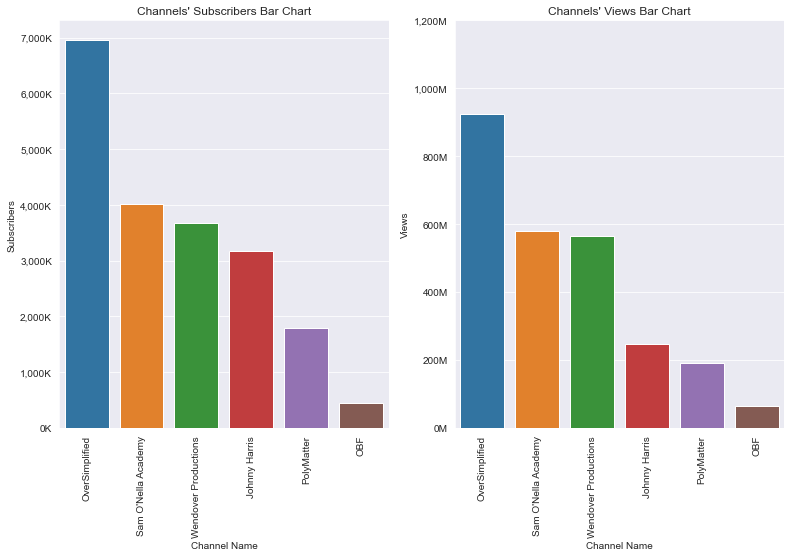

In [4]:
# Creating side-by-side bar plots
viz_data = df1_channels_overview.sort_values('subscribers', ascending = False)
plt.rcParams["figure.figsize"] = [13.00, 7.5]
sns.set_style(style = 'darkgrid')
fig, ax = plt.subplots(1,2)


ax[0] = sns.barplot(data = viz_data, x = 'channelName', y = 'subscribers', ax = ax[0])
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[0].set_ylabel('Subscribers')
ax[0].set_xlabel('Channel Name')
ax[0].set_title("Channels' Subscribers Bar Chart")
plot1 = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1] = sns.barplot(data = viz_data, x = 'channelName', y = 'views', ax = ax[1])
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[1].set_ylabel('Views')
ax[1].set_xlabel('Channel Name')
ax[1].set_title("Channels' Views Bar Chart")
ax[1].set_ylim(0, 1200000000)
plot2 = ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
plt.show()

Note that the y axis of the 2 bar charts above are different in value and scale. Views of the videos will surely be much higher. Also, the views also include the number of views of people who haven't subscribed to their channel, which may take a significant portion of their total views.

Common sense would suggest that the more the subscribers, the more the views would be. As shown in the side-by-side charts, the common theory holds its own ground as the order of channels with more views follows that of the channels with more subscribers.

But, from the table there is at least one more factor that can be taken into account; the total videos. So to fairly set the stage, a new column will be added called 'views/subscriber/vid'. 

In [5]:
# Creating the 'views/subscriber/vid' column
df1_channels_overview['views/subscriber/vid'] = (df1_channels_overview['views'] / df1_channels_overview['subscribers']) / df1_channels_overview['totalVids']
df1_channels_overview.sort_values('views/subscriber/vid', ascending = False) # Order by highest value first

,channelName,subscribers,views,totalVids,playlistId,views/subscriber/vid
2,OverSimplified,6960000,925160219,29,UUNIuvl7V8zACPpTmmNIqP2A,4.583632
0,Sam O'Nella Academy,4020000,581082142,61,UU1DTYW241WD64ah5BFWn4JA,2.369636
4,OBF,454000,65282657,78,UUK1XzxcKXB_v_dcw_tflC1A,1.843518
5,PolyMatter,1790000,191806190,129,UUgNg3vwj3xt7QOrcIDaHdFg,0.830653
3,Wendover Productions,3680000,564619657,190,UU9RM-iSvTu1uPJb8X5yp3EQ,0.807522
1,Johnny Harris,3170000,246901916,125,UUmGSJVG3mCRXVOP4yZrU1Dw,0.623096


Basically, treat this new column as a metric of how many views one subscriber gives for each video. Judging from the values OverSimplified's number seems very high, almost double that of the second place, Sam O'Nella Academy. <br>
I know this metric isn't perfect as there are also views from non-subscribers, so this metric is fully valid if only subscribers watch their videos. But this gives an idea that subscribers effect on total views is different throughout the 6 observed channels, grossly simplified; not all subscribers are created the same. It may also be the case that OverSimplified and Sam O'Nella Academy videos do better in attracting non subscribers, though that statement remains yet to be proven.

Another method of exploring is looking at **view distributions for every channel**. This is best described with a visualization method called 'violinplot'. For this job, the table of 'df2_video_statistics' is used.

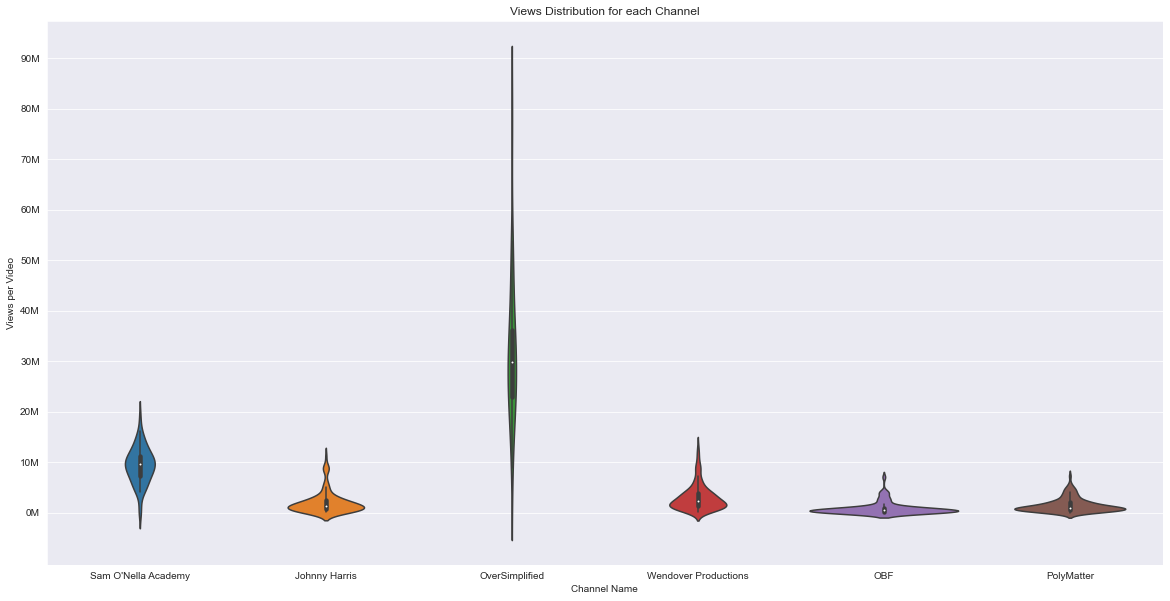

In [6]:
# Creating a violin plot of views distributions
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_style(style = 'darkgrid')
ax = sns.violinplot(data = df2_video_statistics, x = 'channelTitle', y = 'viewCount')
ax.set_title('Views Distribution for each Channel')
ax.set_xlabel('Channel Name')
ax.set_ylabel('Views per Video')
ax.set_yticks(list(range(0,100000000, 10000000)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.show()

Used to visualize the distribution of numerical data, a violin plot shows summary statistics and the density of each variable. The wider the section means higher probability the video views will take on the given value (the y axis value). For example, the majority of OverSimplified's videos have views of around the 25-35 millions range, as the buldge widens at that range.

Looking at the plot, it's clear that OverSimplified is miles ahead in terms of views/video (mind you that this channel has also the highest subscribers). Sam O'Nella Academy's videos also tend to stand out, while the distributions of the rest of the channels are somewhat comparable. It is a good idea though to create another similar plot with OverSimplified's data excluded. That will show the comparison of the other channels more evenly and easier to distinguish.

#### 4.2. Does longer videos translate to more or less viewers and interactions?

In the past project, I used the '.corr()' method to determine correlations of all features and plotting the heat map, the method was made possible using the Pearson correlation coefficient method (there are also other methods). But now, the approach used will be through plotting different charts and trying to find patterns by comparing these plots. Though an extra step of '.corr()' method would also be beneficial to verify our findings from observations. 

For starters, a histogram plot is generated as shown below. This will visualize the distribution of durations of all videos (612 of them). If there is any, videos with durations of more than 2 hours will be excluded (like streaming sessions).

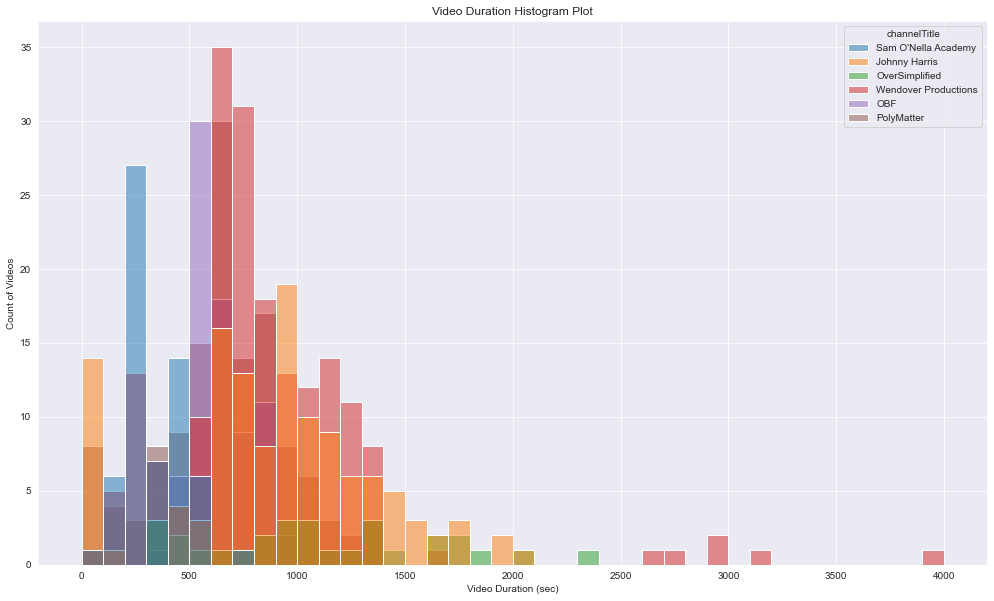

In [7]:
# Creating the histogram plot, while limiting the duration of video to no more than 2 hours
viz_data = df2_video_statistics[df2_video_statistics['durationSecond'] < 7200]
plt.rcParams["figure.figsize"] = [17, 10]
sns.set_style(style = 'darkgrid')

sns.histplot(data = viz_data, x = 'durationSecond',hue = 'channelTitle', binwidth = 100)
# Use 'kde = True' for adding shape of the distribution of each channel

plt.xlabel('Video Duration (sec)')
plt.ylabel('Count of Videos')
plt.title('Video Duration Histogram Plot')
plt.show()

The plot shows that most videos uploaded have durations in the range of 200 - 1000 seconds or approximately 3 - 16 minutes. Now to explore the relationships of duration and comments/views.

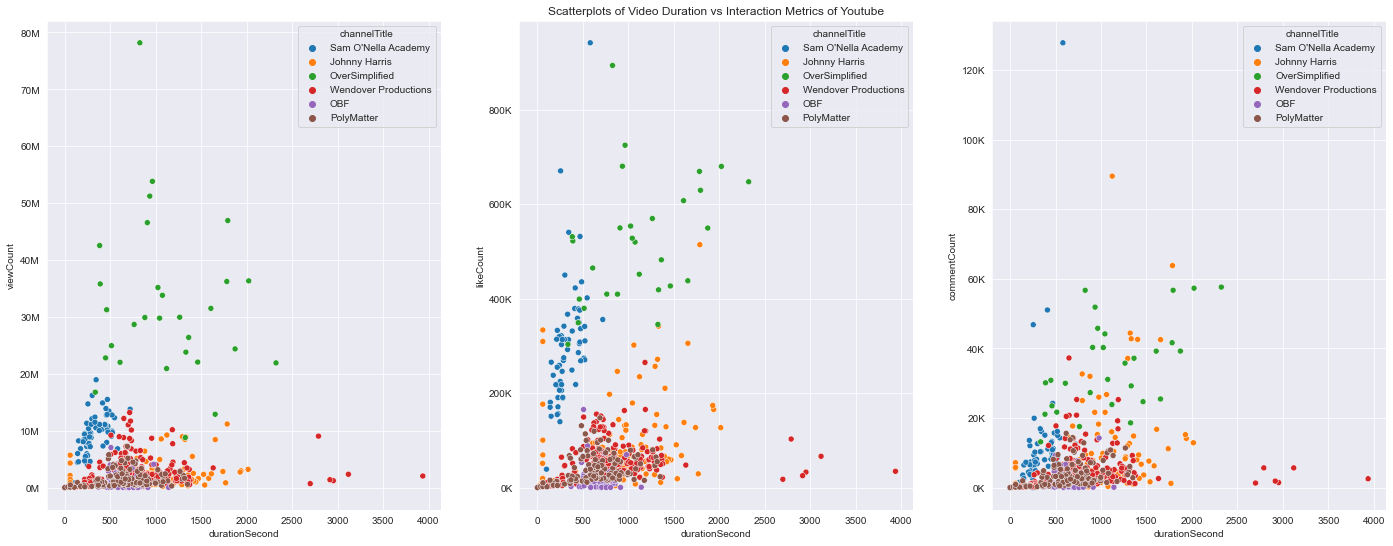

In [8]:
# Creating side-by-side plots of duration vs views, likes, and comments
plt.rcParams["figure.figsize"] = [24.00, 9]
sns.set_style(style = 'darkgrid')
fig, ax = plt.subplots(1,3)
ax[0] = sns.scatterplot(data = df2_video_statistics, x = 'durationSecond', y = 'viewCount', hue = 'channelTitle', ax = ax[0])
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

ax[1] = sns.scatterplot(data = df2_video_statistics, x = 'durationSecond', y = 'likeCount', hue = 'channelTitle', ax = ax[1])
ax[1].set_title('Scatterplots of Video Duration vs Interaction Metrics of Youtube')
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax[2] = sns.scatterplot(data = df2_video_statistics, x = 'durationSecond', y = 'commentCount', hue = 'channelTitle',ax = ax[2])
ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.show()

Looking at the scatterplots, the pure correlations of duration and views/likes/comments seem to be weak or negligible. But let's try to observe based on the channels:
- Wendover Productions (red colored) is the only channel who has videos of very long durations (passes beyond the 2500 secs). All these videos seem to perform worse, if not the same, compared to its shorter videos either on views or interactions.
- Polymatter's (brown colored) videos are more uniformly clustered across all plots. While its longest videos (far right brown dots) don't seem to perform bad at views count, they aren't necessarily the best performers either.
- OverSimplified's (green colored) longest video or the green dot at the right most point of the first plot, seems to get significantly lower views compared to its most other videos. But on the second and third plot, the very same video seems to have higher interactions. This is contrary to the common thinking of 'more views, more interactions'.

If anything the scatter points above seem to cluster together based on the channels itself, which is hardly a surprise. The dots seem to consistently cluster together based on their colors, like the brown (PollyMatter) ones. Even the green (OverSimplified) dots seem to cluster together much more loosely on all plots, consistently (Note that this channel has fewer videos too).

**Summing up:** <br>
Based on the plots, there seem to be weak to no correlations of video duration and the other interaction metrics. Though there is a better chance of getting higher views and interactions by sticking with normal, not very long videos. Additionally, the plots also imply to have videos less than 2500 seconds or approximately 40 minutes for better results.

#### 4.3. Do the amount of likes and comments matter to number of views?

Basic logic would suggest that there is positive relationship between views and the likes/comments. But first, let's see how likes and comments are correlated to each other, using the raw values of 'commentCount' and 'likeCount'. And let's try adding a linear regression line, using seaborn's regplot. 

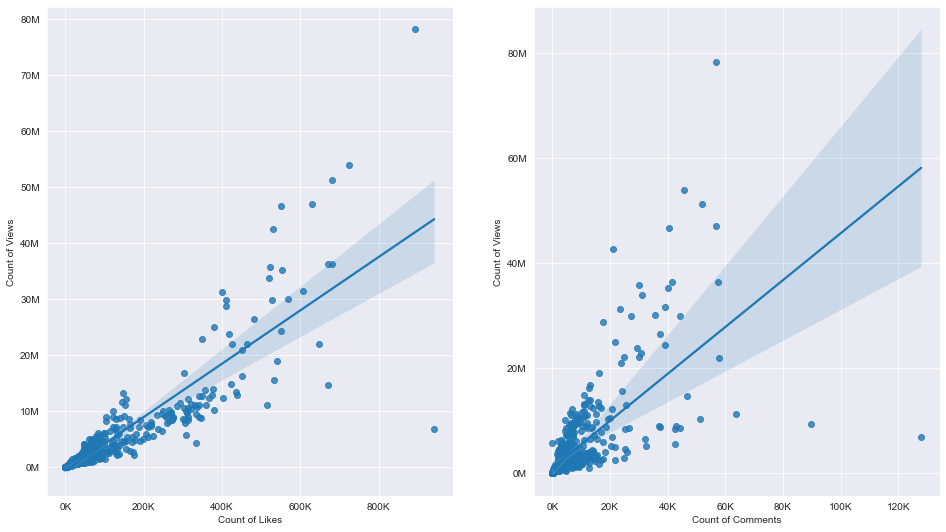

In [9]:
# Plotting a scatter plot with regression line using 'commentCount' and 'likeCount'
plt.rcParams["figure.figsize"] = [16.00, 9]
sns.set_style(style = 'darkgrid')
fig, ax = plt.subplots(1,2)
# Confidence Interval (CI) left default on 95%
ax[0] = sns.regplot(data = df2_video_statistics, x = 'likeCount', y = 'viewCount',ax = ax[0])
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[0].set_xlabel('Count of Likes')
ax[0].set_ylabel('Count of Views')

ax[1] = sns.regplot(data = df2_video_statistics, x = 'commentCount', y = 'viewCount', ax = ax[1])
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[1].set_xlabel('Count of Comments')
ax[1].set_ylabel('Count of Views')
plt.show()

Indeed, there are positive relationships between views vs likes and comments. Though, the views vs comments one exhibits a linear regression with much wider confidence interval, considering the more scattered dots on the right section of said plot. I decided not to differentiate the dots based on the channels, as putting 6 regression lines on one plot seems unwise.

Now let's try expanding the analysis by creating the plots using the normalized 'likeRatio_1k_views' and 'commentRatio_1k_views'. For reminders, these ratios are how many likes and comments there are per 1000 views on every video.

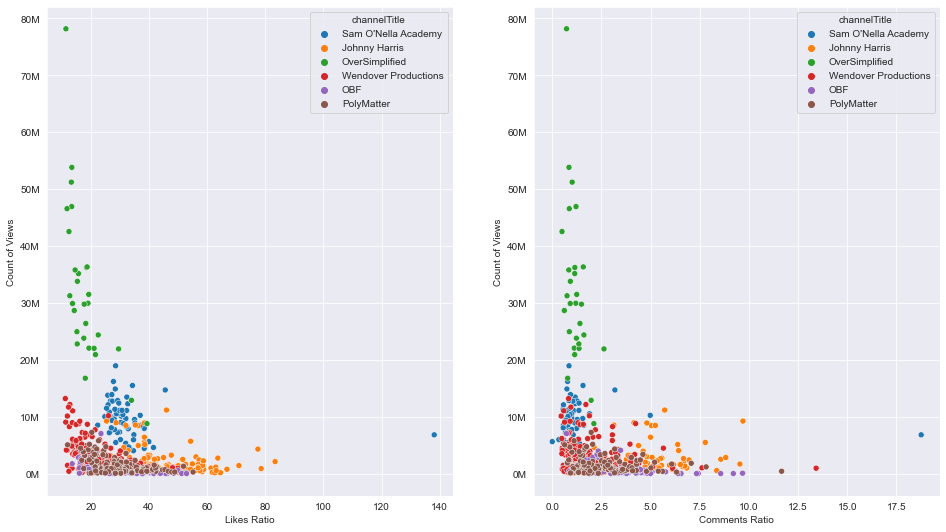

In [10]:
plt.rcParams["figure.figsize"] = [16.00, 9]
sns.set_style(style = 'darkgrid')
fig, ax = plt.subplots(1,2)

ax[0] = sns.scatterplot(data = df2_video_statistics, x = 'likeRatio_1k_views', y = 'viewCount', hue = 'channelTitle',ax = ax[0])
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[0].set_xlabel('Likes Ratio')
ax[0].set_ylabel('Count of Views')

ax[1] = sns.scatterplot(data = df2_video_statistics, x = 'commentRatio_1k_views', y = 'viewCount', hue = 'channelTitle', ax = ax[1])
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[1].set_xlabel('Comments Ratio')
ax[1].set_ylabel('Count of Views')
plt.show()

Now taking the ratios into account, these scatterplots tell a different story. Generally speaking, videos with higher views tend to have lower interaction ratios. But a quick observation suggests that the most influential factor for the comments and likes ratio is again, the channel itselfs. This shows that every channel's audience interaction level is highly distinctive from one another. Here's some examples for context:<br>
- Notice the homogenous metrics on OverSimplified's videos (green dots); most of the dots are in the left side of the plot, the ratios are somewhat similar on all the videos, with only a very slight increase in the likes ratio the lower the views are. Hypothetically, there could be a lot of non subscribers or viewers on the other side of the spectrum who run into his videos.
- In contrast, PolyMatter's videos (brown dots) has a wide range of likes and comments ratio, but with a much smaller range of views count.

**Summing up:**<br>
Based on the 2 first regression plots, it is evident that there are positive correlations that the count of likes and comments lead to higher views. So yes, the amount of likes and comments do matter for views. If anything, likes seem to be the better pick as a feature compared to comments, considering its linear regression.<br>
Also, using the interaction ratios to create more plots is a brief expansion of the likes/comments on views analysis.

#### 4.4. Does title length affect the number of views?

Similar in fashion, another plot was made on title length vs views.

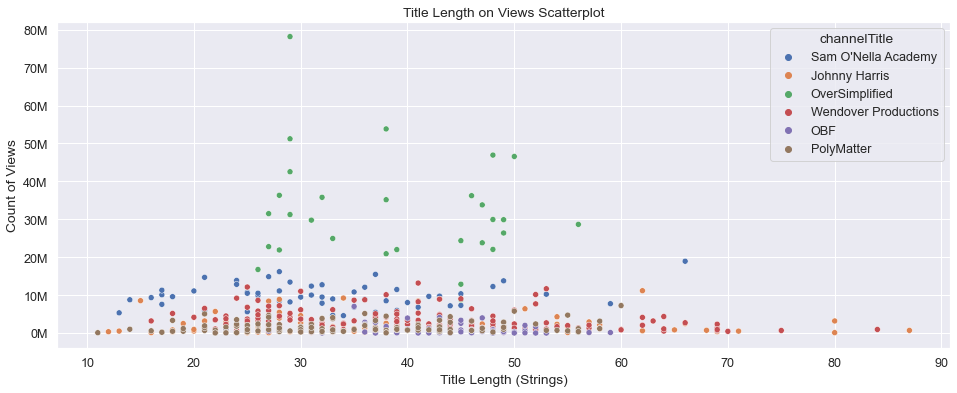

In [11]:
plt.rcParams["figure.figsize"] = [16.00, 6]
sns.set_style(style = 'darkgrid')
sns.set(font_scale = 1.15)

ax = sns.scatterplot(data = df2_video_statistics, x = 'titleLength', y = 'viewCount', hue = 'channelTitle', color = 'orange')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

plt.title('Title Length on Views Scatterplot')
plt.xlabel('Title Length (Strings)')
plt.ylabel('Count of Views')
plt.show()

There doesn't seem to exist a clear connection between title length and views. No video with titles longer than 70 characters seem to do well, but that isn't enough of an evidence to deduce there is a relationship between video title length and views. This is understandable, as video title as a feature is highly qualitative in nature. Intrinsics essence of the title or the topic the video covers is more of a logical cause of how well the video does on views.

**Summing up:**<br>
No, title length doesn't affect the number of views.


#### 4.5. Which days are the videos most uploaded by each channel?

Answering this question, best be visualized with bar plots.

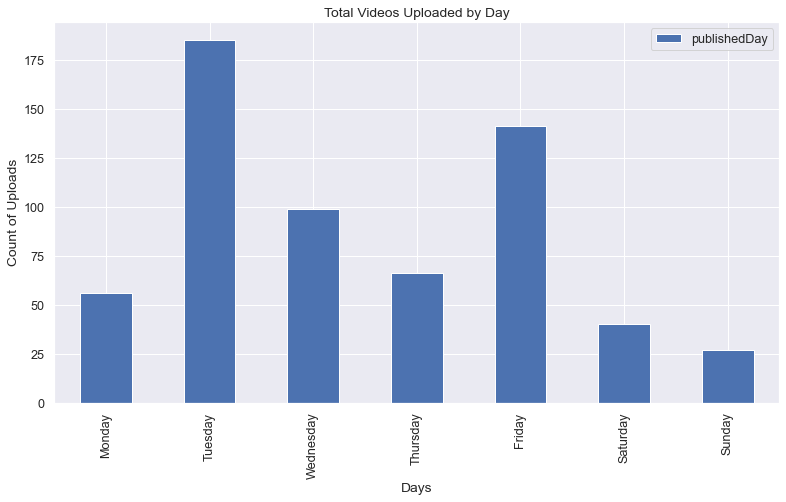

In [12]:
day_upload_df = pd.DataFrame(df2_video_statistics['publishedDay'].value_counts())
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_upload_df = day_upload_df.reindex(days)

plt.rcParams["figure.figsize"] = [13, 7]
sns.set_style(style = 'darkgrid')
ax = day_upload_df.reset_index().plot.bar(x = 'index', y = 'publishedDay')
ax.set_title('Total Videos Uploaded by Day')
ax.set_xlabel('Days')
ax.set_ylabel('Count of Uploads')
plt.show()

It can be seen that most videos were released on Tuesdays and Fridays, with a sizeable amount on Wednesdays. Also, weekend days have the lowest video uploads. This can also imply that the teams behind these channels don't work or have less activities on weekends. Let's try to partition the plot based on channels.

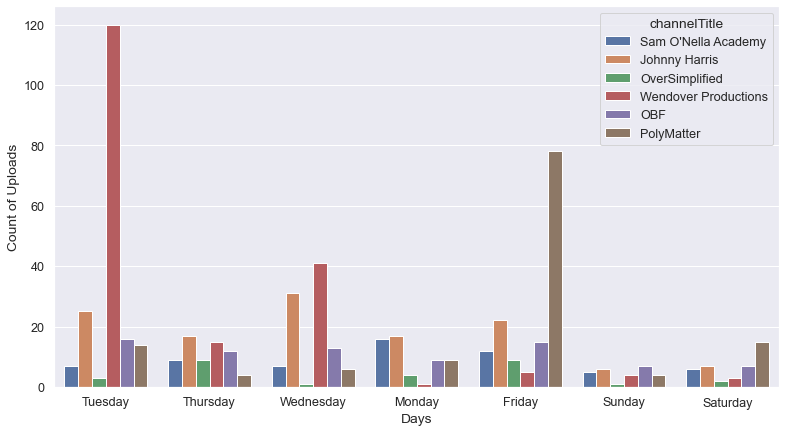

In [13]:
plt.rcParams["figure.figsize"] = [13, 7]
sns.set_style(style = 'darkgrid')
ax = sns.countplot(data = df2_video_statistics, x = 'publishedDay', hue = 'channelTitle')
ax.set_xlabel('Days')
ax.set_ylabel('Count of Uploads')
plt.show()

Pardon the messy order of the days. From here, you can clearly see patterns from some channels. 
- Wendover Production uploads were mostly on tuesdays, and some on wednesdays.
- PolyMatter's uploads were mostly on fridays, but this channel also holds the title of most uploads on sundays.
- OBF, Sam O'Nella and Johnny Harris' uploads were more scattered throughout the weekdays.

So, drilling through the data and looking down one level gives much more insights. Looking at the first plot, it's easy to think that tuesdays are preferred for uploading videos, while in actuality it's one channel (Wendover Production) that drives up the number significantly.

**Summing up:**<br>
Video uploads usually follow each channel's upload schedule, and the pattern could be on specific days or even on random days. But, weekends have significantly less videos published. Looks like youtubers have the weekends off too.

#### 4.6. Does more tags affect the number of views? If so, how many tags?

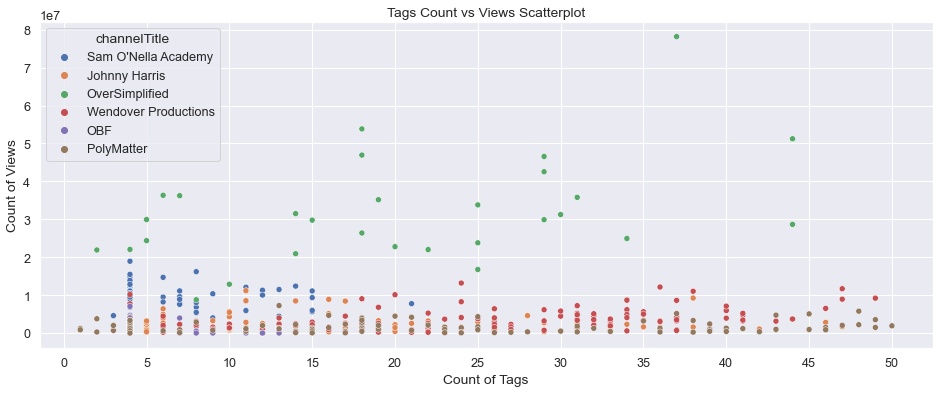

In [14]:
plt.rcParams["figure.figsize"] = [16.00, 6]
sns.set_style(style = 'darkgrid')
sns.set(font_scale = 1.15)
ax = sns.scatterplot(data = df2_video_statistics, x = 'tagsSum', y = 'viewCount', hue = 'channelTitle', color = 'orange')
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.title('Tags Count vs Views Scatterplot')
plt.xticks(np.arange(0, 55, step = 5))
plt.xlabel('Count of Tags')
plt.ylabel('Count of Views')
plt.show()

By looking at the plot, there is no observable relationship between the tags used and the views. Number of tags used doesn't seem to increase/decrease the probability of getting views. Unfortunately, all the videos in our data tables have at least one tag. Thus, results between tagged and non-tagged videos couldn't be determined. However, tags' primary function is to help the Youtube algorithms categorize videos and consequently, making it appear more often when people search for contents relevant to said videos. In other words, it's for keyword-optimizing the videos.

**Summing up:**<br>
Based on the observed data, no. More tags doesn't really affect the view counts. But considering its main purpose as explained before, it's crucial to have the videos tagged. As it shows, there is no single video in the dataset that doesn't have a tag, and rightfully so.

#### 4.7. What are the most popular topics?

In [15]:
# Setting up the parameters and adjusting it for input to the WordCloud
stpwrd = nltk.corpus.stopwords.words('english')
# The 'extension' list includes all extra unnecessary words that I'd found beforehand
extension = ["OverSimplified","Sam O'Nella", "Sam O'Nella Academy", "Sam", "Johnny Harris", "Johnny", "Harris", "OBF", "PolyMatter", "Part", "Wendover Productions", "Wendover", "Want", "Way", "back", "Back", "part"]
stpwrd.extend(extension)

stop_words = set(stpwrd)
df2_video_statistics['title_cleaned_words'] = df2_video_statistics['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words = list([x for y in df2_video_statistics['title_cleaned_words'].tolist() for x in y])
input_wordCloud = ' '.join(all_words) 

In [16]:
# Creating a function to hold the visual parameters of the word cloud and execute it
def get_cloud_word(input_wordcloud):
    wordCloud = WordCloud(width = 2000, height = 1200, random_state = 1, background_color = '#635B73',
                     colormap = 'viridis', collocations = False).generate(input_wordcloud)
    plt.figure(figsize=(30, 20))
    plt.imshow(wordCloud) 
    plt.axis("off")

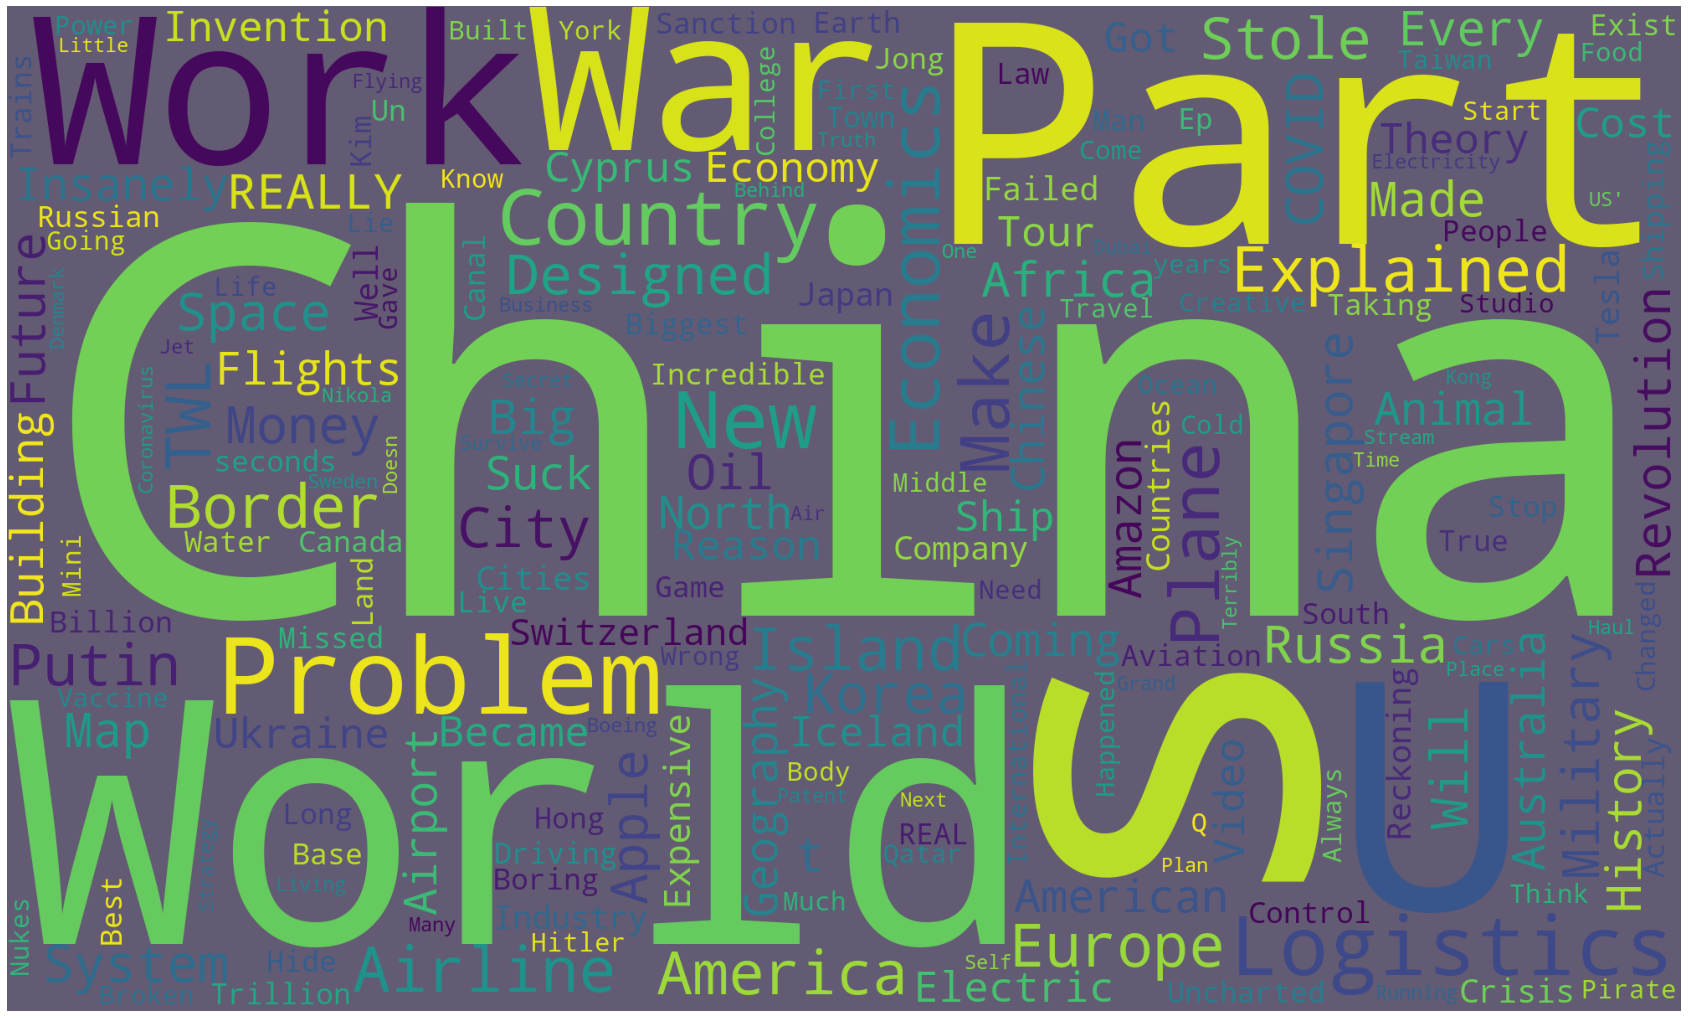

In [17]:
# Executing the wordcloud
get_cloud_word(input_wordCloud)

**The Answer:**<br>
I made the wordcloud very large to ensure the readibility of the content. As stated in the beginning, lots of these channels cover geopolitics, history, and such. Here, it clearly shows. The most recurring words are 'China', 'World', 'Work', 'War', and more. There are also lots of other locations like 'Europe', 'Africa', and 'America'. There are also 'somewhat very controversial' leaders like 'Hitler' and 'Putin'. Browsing through the worcloud, this gives a snippet of what the most used and popular topics are. From the wordlcloud, I could come up with a video idea of 'Russian Logistics at the War' (with Ukraine, obviously) and I bet there's already at least a video that covers the very same topic.

The wordcloud basically searches for all the titles and outputs the most frequent words. But since the dataset consists of videos from various channels, the contents of this wordcloud is more skewed toward video titles from channels with more videos. For example, Wendover Productions has 190 videos. That amount far surpasses the others, plus Wendover's contents often revolve around the same content (Trust me I'm a regular on his channel). That's why there are 'logistics', 'airline', and 'plane' in the word cloud.

For extra info, channels like Sam O'Nella Academy and OverSimplified have a more relaxed and comedic tune in the content delivery, but there is little evidence that their topics show up in the word cloud. So, depending on the use case of the analysis, it may be more suitable to do this NLP analysis on a per channel basis.

#### 4.8. In the comments section, what are the words or topics that frequently appear?

In [18]:
stpwrd = nltk.corpus.stopwords.words('english')
# The 'extension' list includes all extra unnecessary words that I'd found beforehand
extension = ["OverSimplified","Sam O'Nella", "Sam O'Nella Academy", "Sam", "Johnny Harris", "Johnny", "Harris", "OBF", "PolyMatter", "Part", "Wendover Productions", "Wendover", "Want", "Way", "back", "Back", "part"]
stpwrd.extend(extension)

stop_words = set(stpwrd)
df3_video_comments['comments_cleaned'] = df3_video_comments['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words2 = list([x for y in df3_video_comments['comments_cleaned'].tolist() for x in y])
input_wordCloud2 = ' '.join(all_words2) 

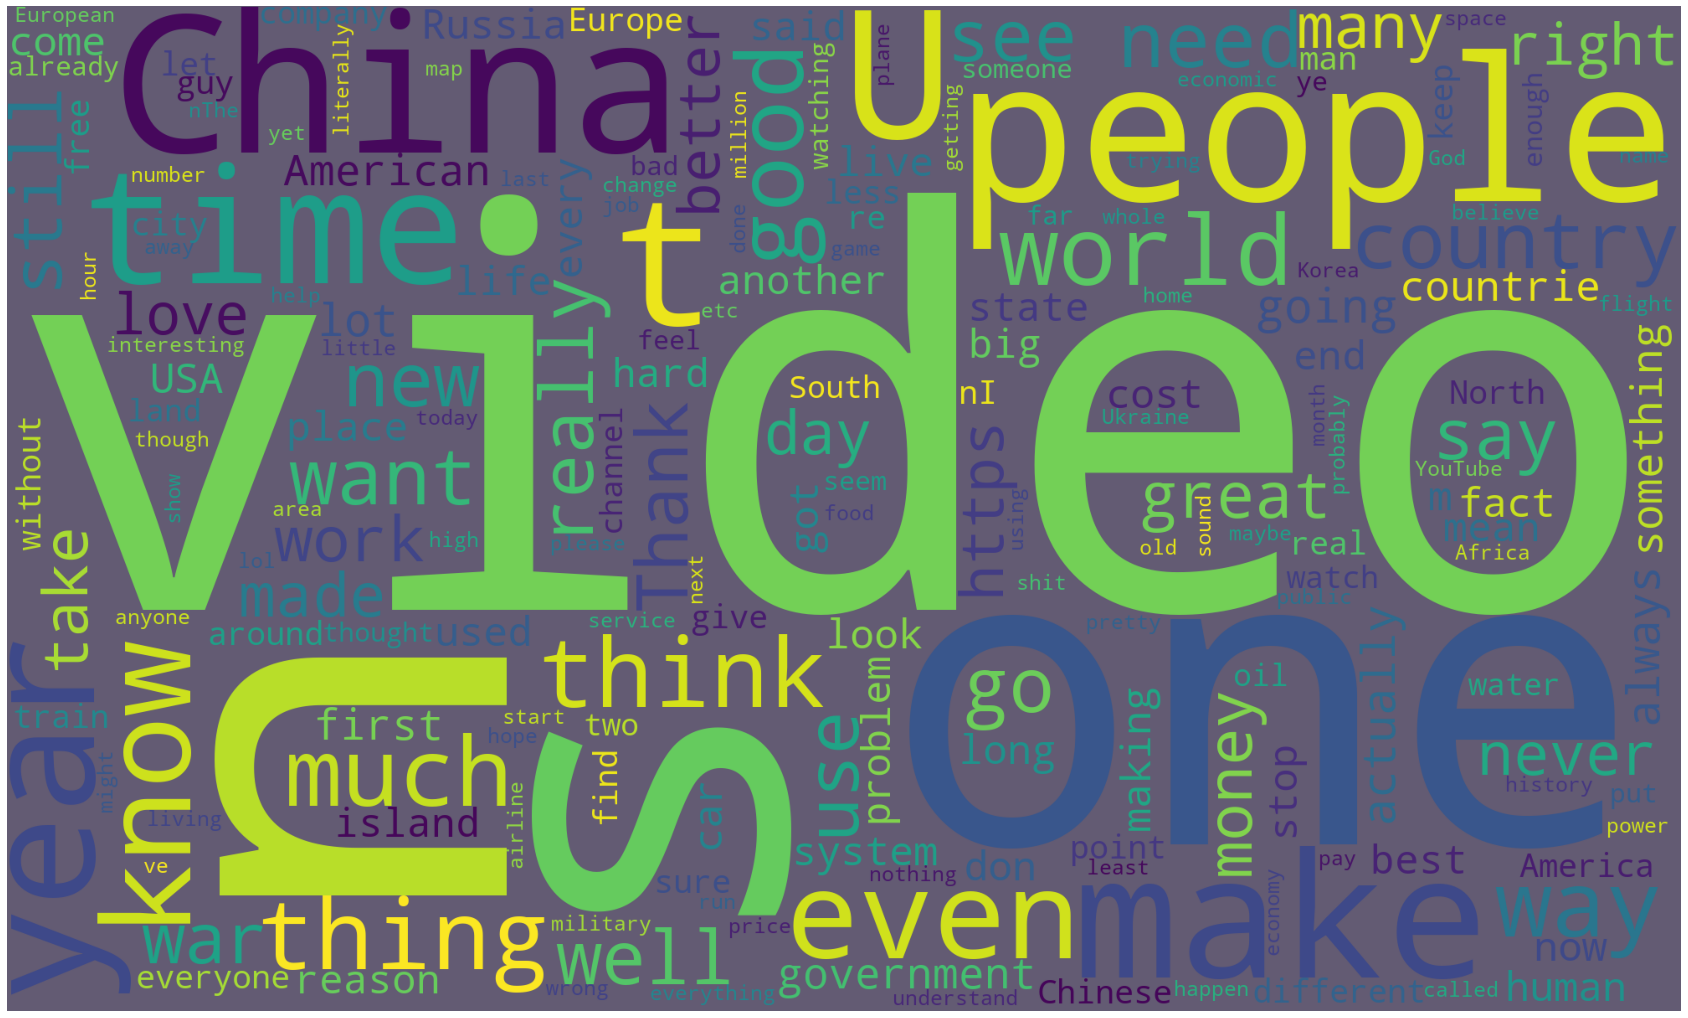

In [19]:
get_cloud_word(input_wordCloud2)

**The Answer:**<br>
Same method, but in comment sections. The obvious words are 'video', 'one', and 'people'. There are also many words with positive connotation like 'thank', 'good', 'great', 'better', and 'love'. Considering a lot of the videos are about education, geopolitics, history, and the like, seems like many comments are opinions on the topic of the videos. There are even still geography key words like 'Africa', 'USA', 'Ukraine', 'North'.

As it is like the previous wordcloud, this wordcloud is susceptible to be dominated by comments of channels with higher count of videos. Separating the comments based on every channel may give clearer insights of comments from other channels. If wordclouds were made based on Sam O'Nella Academy and OverSimplified videos, the word cloud may exhibit much less serious and funny words (and obviously, some cursive unnice words).

### 5. Wrapping Up

After exploring and answering all the objectives, I myself learned a lot from working with the Youtube API to the debunking of many Youtube's myths represented by the objectives. Along the way I also noticed some of the flaws on the analysis methods, and the potential fix to better enhance the exploration. Here's some ideas for future improvement and project expansion:
- It is better to do channels with comparable total videos when doing a channels comparison analysis.
- Another method for analyzing videos from multiple channels, is to limit the videos obtained (say, 50 latest videos) from every channel to produce a more unbiased, uniformly sample-sized dataset.
- Narrow the dataset to channels with a more niche and specific style and content.
- It is feasible to do market research analysis with deep dive investigation of the comments section, identifying most common questions or sentiments.
- Analyzing channels' abilities to reach external non-subscriber users by conducting a breakdown of views and comments from each channel's videos. Thus, a forecast of channel's metrics can potentially be made with several methods of machine learning.
- Doing a more advanced NLP exploration (using newer, improved packages for NLP) to extract more qualitative insights and speculate favorable topics for future videos.



Of course, those are what I came up with at the moment. There is so much more that can be done. <br>
That marks the ending of this project, I hope you learned some new stuff and enjoyed it as much as I did. Didn't have much time lately, so this has been going on for a while.

Thank you for reading, God Bless!
<br><br><br><br><br><br>







| Date (DD-MM-YYYY) | Author                             | Environment                              |
| ----------------- | ---------------------------------- | ---------------------------------------- |
| 01-12-2022        | Edricnes                           | JupyterLab (Python v3.9.12)              |


